Iris Dataset Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Iris Dataset Accuracy: 1.00


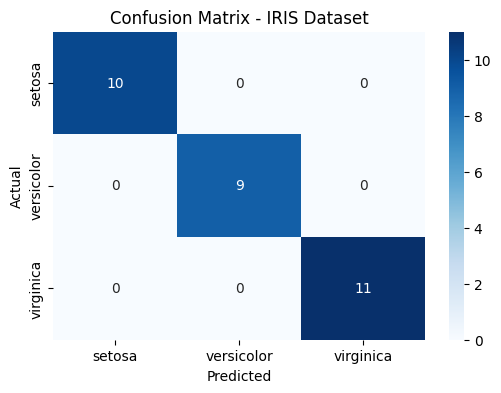

Diabetes Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

Diabetes Dataset Accuracy: 0.69


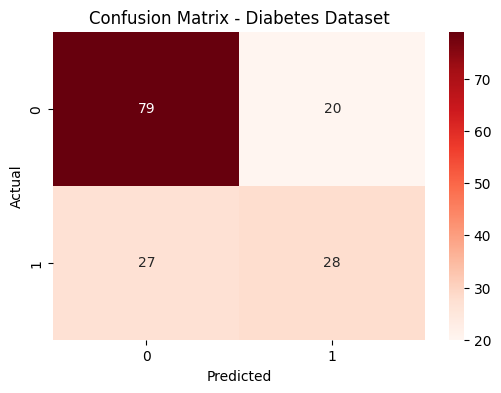

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load datasets
iris_data = pd.read_csv("/content/iris (3).csv")
diabetes_data = pd.read_csv("/content/diabetes (1).csv")

# 1. KNN Classifier for IRIS Dataset
# Splitting features and target
X_iris = iris_data.drop(columns=['species'])
y_iris = iris_data['species']

# Train-test split (80% train, 20% test)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train KNN model (choosing K=5 as an example)
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train_iris, y_train_iris)

# Predictions
y_pred_iris = knn_iris.predict(X_test_iris)

# Accuracy and Confusion Matrix
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)

print("Iris Dataset Classification Report:")
print(classification_report(y_test_iris, y_pred_iris))
print(f"Iris Dataset Accuracy: {accuracy_iris:.2f}")

# Plot Confusion Matrix for IRIS
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_iris, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_iris), yticklabels=np.unique(y_iris))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - IRIS Dataset')
plt.show()

# 2. KNN Classifier for Diabetes Dataset
# Splitting features and target
X_diabetes = diabetes_data.drop(columns=['Outcome'])
y_diabetes = diabetes_data['Outcome']

# Train-test split (80% train, 20% test)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_diabetes_scaled = scaler.fit_transform(X_train_diabetes)
X_test_diabetes_scaled = scaler.transform(X_test_diabetes)

# Train KNN model (choosing K=5 as an example)
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train_diabetes_scaled, y_train_diabetes)

# Predictions
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes_scaled)

# Accuracy and Confusion Matrix
accuracy_diabetes = accuracy_score(y_test_diabetes, y_pred_diabetes)
conf_matrix_diabetes = confusion_matrix(y_test_diabetes, y_pred_diabetes)

print("Diabetes Dataset Classification Report:")
print(classification_report(y_test_diabetes, y_pred_diabetes))
print(f"Diabetes Dataset Accuracy: {accuracy_diabetes:.2f}")

# Plot Confusion Matrix for Diabetes
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_diabetes, annot=True, cmap='Reds', fmt='d', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Diabetes Dataset')
plt.show()

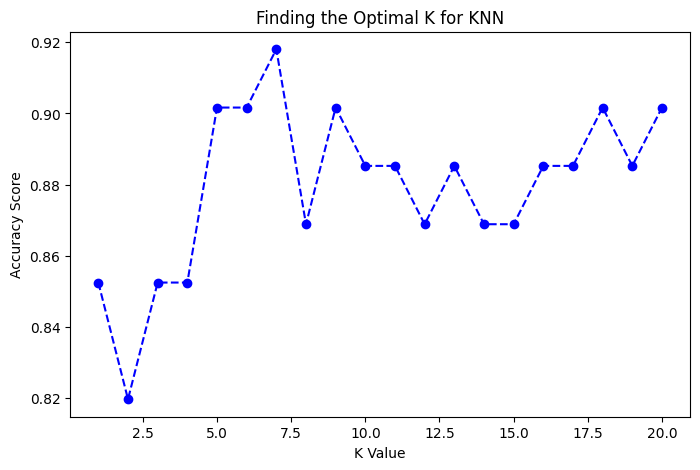

Best K value: 7
Heart Disease Dataset Accuracy: 0.92


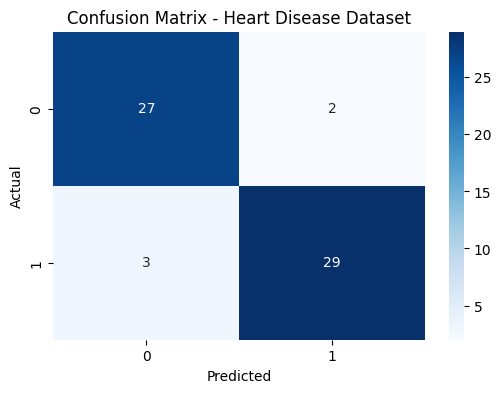

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
heart_data = pd.read_csv("/content/heart (1).csv")

# Splitting features and target
X_heart = heart_data.drop(columns=['target'])
y_heart = heart_data['target']

# Train-test split (80% train, 20% test)
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_heart_scaled = scaler.fit_transform(X_train_heart)
X_test_heart_scaled = scaler.transform(X_test_heart)

# Finding the best K value
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_heart_scaled, y_train_heart)
    y_pred = knn.predict(X_test_heart_scaled)
    accuracy_scores.append(accuracy_score(y_test_heart, y_pred))

# Plot accuracy vs. K value
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Finding the Optimal K for KNN')
plt.show()

# Best K value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K value: {best_k}")

# Train final model with the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_heart_scaled, y_train_heart)
y_pred_heart = knn_best.predict(X_test_heart_scaled)

# Accuracy Score
accuracy_heart = accuracy_score(y_test_heart, y_pred_heart)
print(f"Heart Disease Dataset Accuracy: {accuracy_heart:.2f}")

# Confusion Matrix
conf_matrix_heart = confusion_matrix(y_test_heart, y_pred_heart)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_heart, annot=True, cmap='Blues', fmt='d', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Heart Disease Dataset')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_heart, y_pred_heart))